# Tugas

Kelompok :
1. Desy Ayurianti       (07/TI-3E)
2. Wanda Febrina Cahya  (29/TI-3E)

## Soal 
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
    - Metode pra pengolahan
    - Pemilihan fitur
    - Arsitektur ANN
    - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
    - AKURASI
    - CONFUSION MATRIX
    - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

## Import Library

In [16]:
# Library untuk permodelan ANN
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras import layers, models

# untuk mengelola dataset, melakukan pemisahan data, dan untuk evaluasi model.
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# untuk operasi numerik.
import numpy as np
# untuk visualisasi hasil atau data.
import matplotlib.pyplot as plt

## Data Pre-processing

In [9]:
# Mengimpor dataset MNIST dari TensorFlow
mnist = tf.keras.datasets.mnist
# Memuat data latih (x_train, y_train) dan data uji (x_test, y_test) dari dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalisasi data

## Arsitektur Model ANN

In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Mengubah citra 28x28 menjadi vektor
    Dense(128, activation='relu'),   # Lapisan tersembunyi 1 dengan 128 neuron dan ReLU
    Dense(64, activation='relu'),    # Lapisan tersembunyi 2 dengan 64 neuron dan ReLU
    Dense(10, activation='softmax')  # Lapisan output dengan 10 neuron (karena 10 kelas) dan softmax
])

## Kompilasi Model

In [11]:
#konfigurasi model jaringan saraf tiruan (ANN)
#menggunakan optimizer "adam" untuk mengoptimalkan model 
#menggunakan fungsi kerugian "sparse_categorical_crossentropy" karena sedang melakukan tugas klasifikasi multikelas. 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training Model

In [13]:
#melakukan training dengan 10 epochs
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0327 - accuracy: 0.9897
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0280 - accuracy: 0.9909
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0245 - accuracy: 0.9919
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0200 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0171 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0135 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0132 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0147 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.012

## Evaluasi Model

In [18]:
y_pred = model.predict(x_test) #membuat prediksi pada data pengujian (x_test). Hasil prediksi ini akan berisi probabilitas untuk setiap kelas dalam tugas klasifikasi multikelas
y_pred_classes = y_pred.argmax(axis=-1) # mengambil kelas dengan probabilitas tertinggi untuk setiap contoh data pengujian
accuracy = accuracy_score(y_test, y_pred_classes) # menghitung akurasi model. 
confusion_mat = confusion_matrix(y_test, y_pred_classes) #menghitung matriks konfusi untuk lebih memahami sejauh mana model berhasil dalam mengklasifikasikan contoh-contoh dalam setiap kelas
# Mencetak akurasi
print("Akurasi:", accuracy)

313/313 [==============================] - 1s 2ms/step
Akurasi: 0.979


## Analisis Hasil

In [19]:

print("Confusion Matriks:")
print(confusion_mat)

Confusion Matriks:
[[ 970    1    2    1    0    0    1    0    2    3]
 [   0 1130    0    2    0    0    1    0    2    0]
 [   0    3 1011    4    3    0    3    2    4    2]
 [   2    0    3  994    0    0    0    2    6    3]
 [   0    0    3    0  956    1    5    0    2   15]
 [   0    0    0   19    1  858    4    0    8    2]
 [   3    3    0    1    7    7  933    0    3    1]
 [   3    5   11    4    0    0    0  991    3   11]
 [   0    1    2    7    1    0    0    3  956    4]
 [   1    2    0    6    4    3    0    1    1  991]]


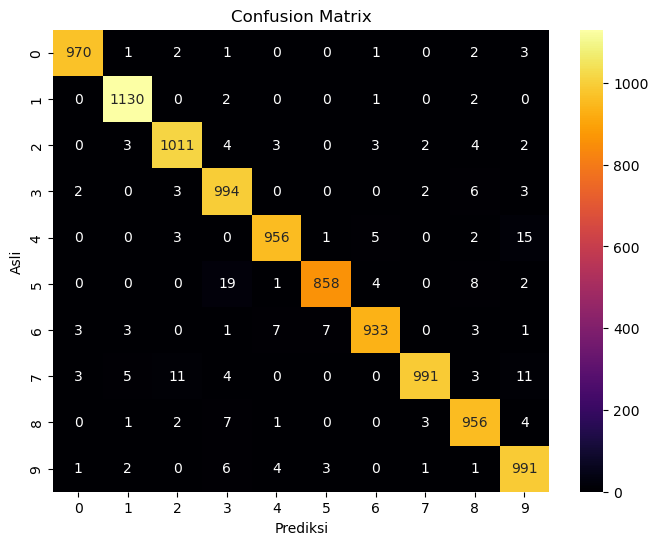

In [26]:

import seaborn as sns

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6)) # membuat gambar atau figur untuk plot ukuran 8 x 6
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='inferno', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.title('Confusion Matrix')
plt.show()

## Visualisasi Data Asli dan Data Prediksi

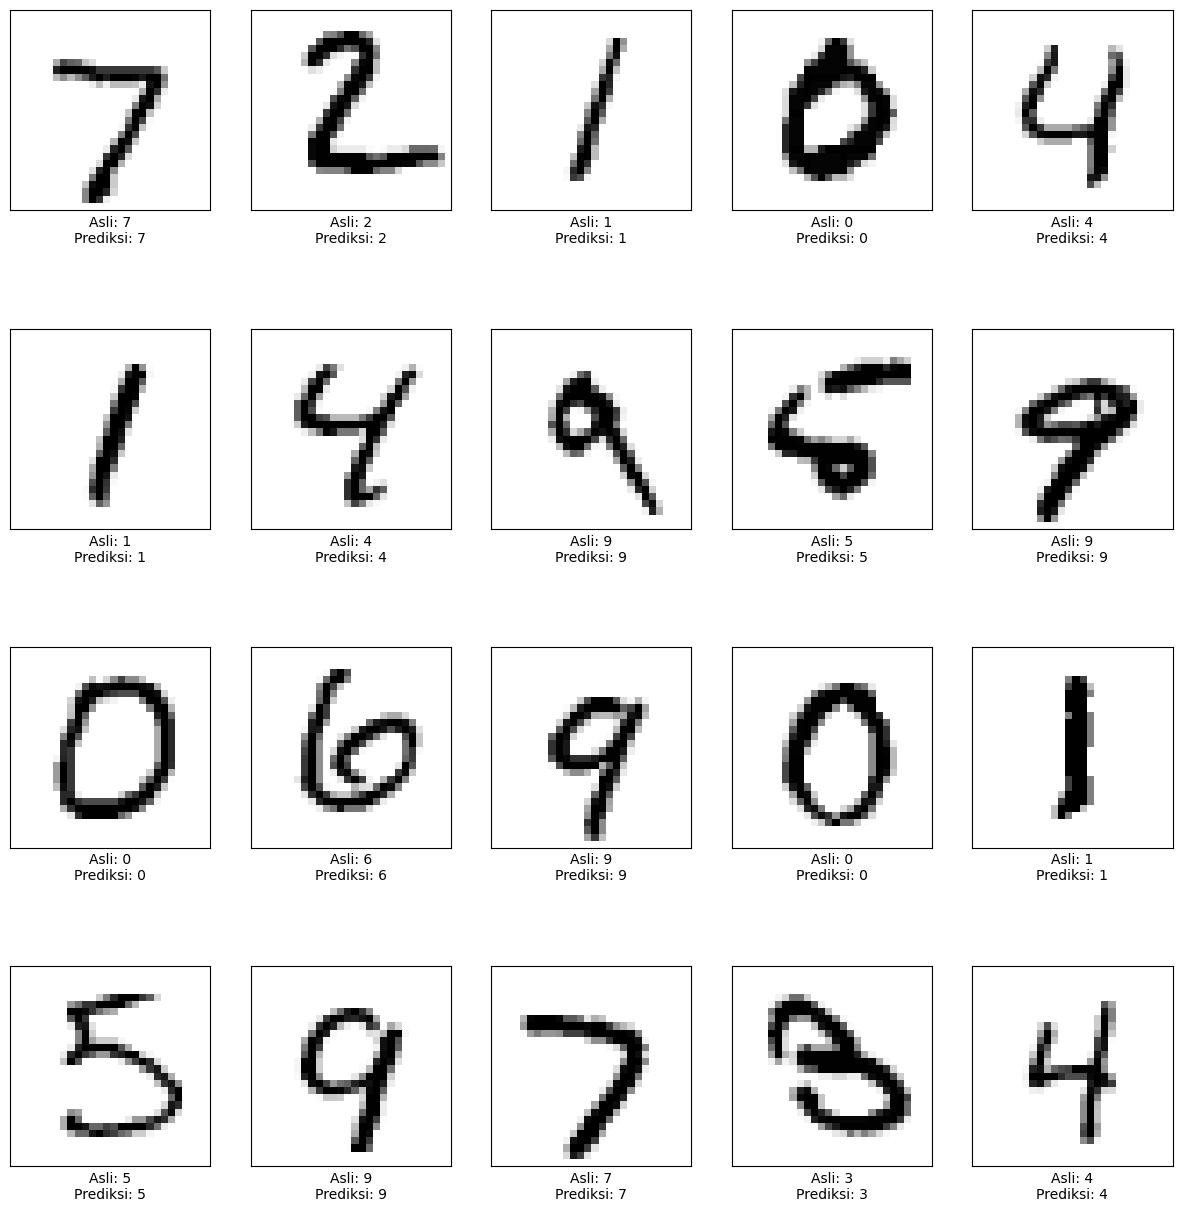

In [27]:
 # Membuat figur dengan ukuran 15x20 (bisa disesuaikan)
plt.figure(figsize=(15, 20))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Menampilkan gambar dalam skala hitam-putih
    plt.imshow(x_test[i], cmap=plt.cm.binary, interpolation='nearest')
    # Memeriksa apakah label asli dan prediksi cocok
    if y_test[i] == y_pred_classes[i]:
      # Jika cocok, label akan berwarna hitam
        label_color = 'black'
    else:
      # Jika tidak cocok, label akan berwarna merah
        label_color = 'red'
    plt.xlabel(f"Asli: {y_test[i]}\nPrediksi: {y_pred_classes[i]}", color=label_color)
# Menampilkan visualisasi gambar dan label asli/prediksi
plt.show()

# Kesimpulan:
Dari klasifikasi pada data MNIST dengan menggunakan permodelan AAN didapatkan hasil sebagai berikut ;
1. **Akurasi** <br>
Model ANN yang telah dibangun memiliki tingkat akurasi yang sangat tinggi, yaitu sekitar 97.9%. Ini berarti model secara akurat dapat mengklasifikasikan data dengan tingkat keberhasilan yang tinggi.
2. **Confussion matrix** <br>
Dari confusion matrix, kita dapat melihat bahwa mayoritas dari elemen diagonal memiliki nilai yang tinggi. Hal ini mengindikasikan bahwa model dengan baik dalam mengklasifikasikan angka-angka sesuai dengan label sebenarnya.

Angka di luar diagonal menggambarkan kesalahan prediksi model. Contohnya, pada baris pertama, terdapat beberapa kesalahan prediksi yang menyebabkan data dengan label 0 salah diklasifikasikan sebagai 1, 2, 3, 8, atau 9.

Meskipun ada kesalahan prediksi, angka di diagonal memiliki nilai yang tinggi, yang menunjukkan tingkat akurasi yang baik dalam mengklasifikasikan data. Oleh karena itu, hasil akurasi sekitar 97.9% adalah akurat, karena mayoritas data telah diklasifikasikan dengan benar.

3. **Konfigurasi model -> mulai dari pra pengolahan sampai arsitektur AAN** <br>
1. Data pra processing
    - import library yang diperlukan yaitu tensorflow
    - Memuat dataset MNIST dan melakukan split data menjadi data pelatihan (x_train,y_train) dan data pengujian (x_test,y_test)
    - Normalisasi data dengan membagi nilai piksel oleh 255

2. Arsitektur Model AAN
    - Import Library untuk model Keras
    - Membuat model sequential

3. Kompilasi Model
    - Kompilasi model dengan optimizer, loss, dan metrik yang sesuai

4. Training Model
    - Melatih model dengan data latih

5. Evaluasi Model
    - Evaluasi model dengan data uji

6. Visualisasi data asli dan data prediksi
    -  Memastikan bahwa data latih dan data uji telah dimuat dan dinormalisasi dengan benar. Ini membantu mengonfirmasi bahwa data yang digunakan dalam pelatihan dan pengujian sesuai dengan ekspektasi.
    - Tahapan ini membantu dalam memahami karakteristik dan pola dari data asli. Selain itu, tahapaan ini juga membantu melihat apakah model Anda mengklasifikasikan data dengan benar dan  bagaimana model memberikan prediksi untuk setiap citra digit.

**Hasil :**
- Evaluasi model dilakukan dengan mengukur akurasi menggunakan data uji untuk mengukur sejauh mana model dapat memprediksi dengan benar.Selanjutnya, data uji digunakan untuk membuat prediksi kelas.
- Dengan mengonversi hasil prediksi, kita dapat menghitung confusion matrix yang memberikan informasi tentang berapa banyak data yang diklasifikasikan dengan benar ke dalam kelas tertentu dan sejauh mana kesalahan prediksi terjadi.
- Confusion matrix sangat informatif untuk mengidentifikasi di mana model melakukan prediksi yang benar dan di mana kesalahan prediksi terjadi.
- Dengan konfigurasi ini, model ANN dapat mengenali digit dalam dataset MNIST dengan tingkat akurasi sekitar 97.9%.